In [1]:
import tensorflow

In [2]:
import keras

In [4]:
%config IPCompleter.greedy=True#enable intellisense
#use shift +TAB for showing help on functions
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [13]:
keras.backend.backend()

'tensorflow'

In [11]:
keras.__version__

'2.6.0'

In [12]:
tensorflow.__version__

'2.6.0'

In [14]:
from keras.datasets import fashion_mnist

In [16]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 38s 8us/step


In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
y_test.shape

(10000,)

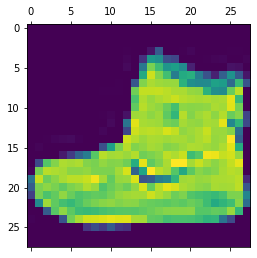

In [21]:
plt.matshow(x_train[0])

In [22]:
y_train[0] 

9

Label description
0- tshirt/top
1-trouser
2-pullover
3-dress
4-coat
5-sandal
6-shirt
7-sneaker
8-bag
9-ankle boot

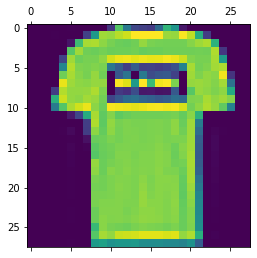

In [23]:
plt.matshow(x_train[1])

In [24]:
y_train[1]

0

Normalize dataset (x_train and x_test) in range 0-1<br>
Actual pixel (image) vlues are in the range 0 to 255, so divide it with 255


In [25]:
x_train=x_train/255
x_test=x_test/255

In [26]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [30]:
#use shift +tab to show the functions

model=Sequential()

In [36]:
#for converting arrays into 1 d flatten is used.
#for input layer
model.add(Flatten(input_shape=[28,28]))

In [32]:
#adding second layer which is fully connected layer
#we do trail and error. we start with 20 neurons usingh some activation function --->sigmoid, relu
#we use relu 

model.add(Dense(20,activation='relu'))

In [33]:
#adding output layer i.e. 10 neurons
#10n because we have 10 labels

model.add(Dense(10,activation='softmax'))#softmax for multiclass classification.

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [37]:
#compiling the model
#loss--its a loss functionn 
#optimizer-- when we want to train neural network ,  it is
#algo which helps in adjusting the weughts of edge neurons
#metrics --->what kind of metrics do we want to ue during training

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics='accuracy')

In [40]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4233 - accuracy: 0.8500
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3938 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3759 - accuracy: 0.8653
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3635 - accuracy: 0.8701
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3501 - accuracy: 0.8731


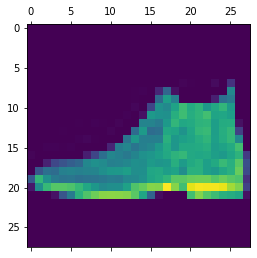

In [41]:
plt.matshow(x_test[0])

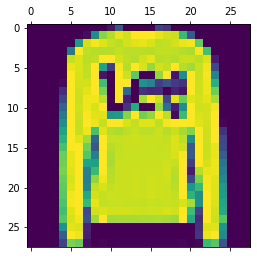

In [43]:
plt.matshow(x_test[1])

In [44]:
pred=model.predict(x_test)

In [45]:
pred[0]

array([3.5141853e-05, 9.7200727e-09, 1.3581432e-07, 1.0917556e-07,
       7.3813709e-08, 3.4422267e-02, 1.5354381e-06, 5.6915276e-02,
       7.1196473e-04, 9.0791351e-01], dtype=float32)

In [47]:
np.argmax(pred[0])

9

In [48]:
np.argmax(pred[1])

2

In [49]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8578


[0.40474456548690796, 0.8578000068664551]